#### Twitter Sentiment Analysis is the process of computationally identifying and categorizing tweets expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral.

#### Twitter Duyarlılık Analizi, özellikle yazarın belirli bir konuya, ürüne vb. karşı tutumunun olumlu, olumsuz veya tarafsız olup olmadığını belirlemek için bir metin parçasında ifade edilen tweet'leri hesaplamalı olarak tanımlama ve kategorize etme işlemidir.

# Twitter Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sentiment.csv')

In [3]:
data = data[['text','sentiment']]

#### First of all, splitting the data set into a training and a testing set. The test set is the 10% of the original data set.
#### For this particular analysis I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

# ---------------------------------------------------------------------------------- #
#### Her şeyden önce, veri kümesini bir eğitim ve test kümesine bölmek. Test kümesi, özgün veri kümesinin %10'udur.
#### Bu özel analiz için tarafsız tweet'leri bıraktım, çünkü amacım sadece olumlu ve olumsuz tweet'leri ayırt etmekti.

In [4]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

#### As a next step I separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.

#### After that I cleaned the text from hashtags, mentions and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.
##### ---------------------------------------------------------------------------------- #####
#### Bir sonraki adım olarak, içerdikleri kelimeleri kolayca görselleştirmek için eğitim setinin Olumlu ve Olumsuz tweet'lerini ayırdım.

#### Bundan sonra metni hashtag'lerden, sözlerden ve bağlantılardan temizledim. Artık Olumlu ve Olumsuz tweet'lerin yalnızca en vurgulu kelimelerini gösteren bir WordCloud görselleştirmesine hazırdılar.


In [7]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']

In [8]:
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [9]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


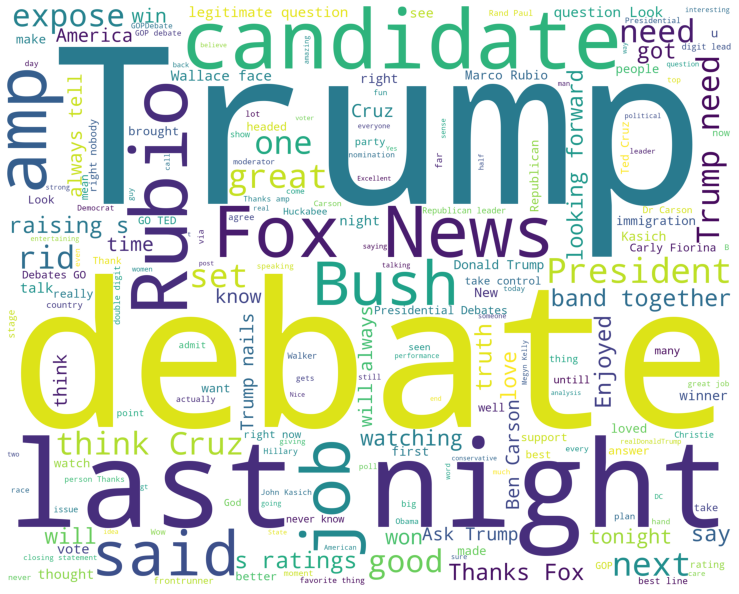

In [10]:
print("Positive words")
wordcloud_draw(train_pos,'white')

Negative words


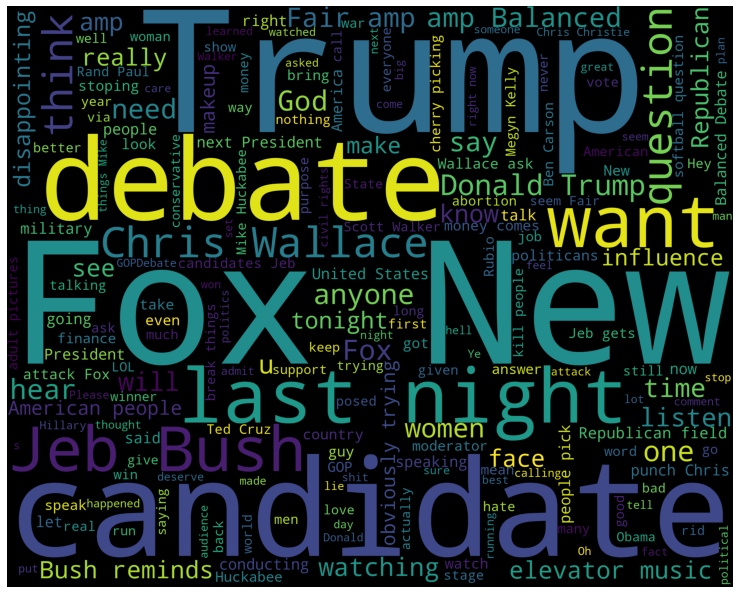

In [11]:
print("Negative words")
wordcloud_draw(train_neg)

#### Interesting to notice the following words and expressions in the positive word set: truth, strong, legitimate, together, love, job

#### In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.

#### At the same time, negative tweets contains words like: influence, news, elevatormusic, disappointing, softball, makeup, cherry picking, trying

#### In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

#### After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

#### Stop Word: Stop Words are words which do not contain important significance to be used in Search Queries.

#### Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

## ---------------------------------------------------------------------- ##

#### Olumlu kelime setinde aşağıdaki kelimeleri ve ifadeleri fark etmek ilginç: gerçek, güçlü, meşru, birlikte, aşk, iş
#### Benim yorumuma göre, insanlar ideal adaylarının doğru, meşru, iyi ve kötünün üstünde olduğuna inanma eğilimindedir.

#### Aynı zamanda, olumsuz tweet'ler aşağıdaki gibi kelimeler içerir: etki, haberler, asansör müziği, hayal kırıklığı, softbol, makyaj, kiraz toplama, deneme
#### Benim anlayışıma göre, insanlar kararlı bir şekilde hareket etmeyi özlediler ve azarlanan adayları çok yumuşak ve kiraz toplama olarak gördüler.

#### Vizualizasyondan sonra, hashtag'leri, sözleri, bağlantıları ve stopwords'leri eğitim setinden kaldırdım.

#### Sözcüğü Durdur: Durdur Kelimeleri, Arama Sorgularında kullanılacak önemli bir önem içermeyen kelimelerdir.

#### Genellikle bu kelimeler arama sorgularından filtrelenir, çünkü çok miktarda gereksiz bilgi döndürürler. ( bunun için, bunun için vb. )

In [12]:
tweets = []
stopwords_set = set(stopwords.words("english"))

In [13]:
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))


In [14]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']

In [15]:
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

#### As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

##### Bir sonraki adım olarak, nltk lib ile sözde özellikleri, önce sık bir dağılımı ölçerek ve ortaya çıkan anahtarları seçerek çıkardım.

In [16]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [17]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

In [18]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

#### Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

#### Bu vesileyle en sık dağıtılan kelimeleri çizdim. Çoğu kelime, tartışma geceleri etrafında toplanmıştır.

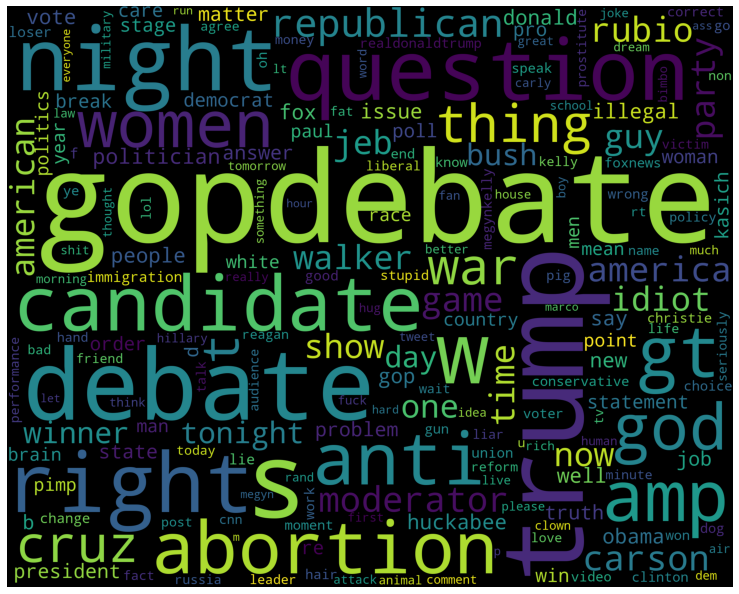

In [19]:
wordcloud_draw(w_features)

#### Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

#### nltk NaiveBayes Sınıflandırıcısını kullanarak Ayıklanan tweet word özelliklerini sınıflandırdım.

In [20]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

#### Finally, with not-so-intelligent metrics, I tried to measure how the classifier algorithm scored.
#### Son olarak, pek akıllı olmayan metriklerle, sınıflandırıcı algoritmanın nasıl puan aldığını ölçmeye çalıştım.

In [21]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1

In [22]:
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1

In [23]:
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 826/787 
[Positive]: 245/92 
